## Capstone Project - The Battle of Neighborhoods - WEEK 4

By Joseph Lwere

## 1.1 Problem Description and Analysis

The analysis of this project is we have a new pizzeria opening up in the Toronto City. The management of the pizzeria want to get a strategic location that will be profitable once the pizzeria opens up. To arrive at this, the management needs guidance to choose the best possible location to set up, this leads to the problem statement.

**Problem Statement:** In this project we want to find the best possible location in Toronto to set up a pizzeria that will kick off with good sales. This location will be one that is strategically located in the city of Toronto. 

## 1.2 Data Requirements
We will open up the pizzeria to have the capacity to supply pizzas using food vendors and online delivery orders system from online stores. We will also want to know the number of nearby restaurants within a 5km radius so we use the neighborhood to determine the number of potential vendors. For orders to be delivered, the volume ordered for each neighborhood's will be considered. The volume of orders is determined by the number of people (population) and average house hold income.

**Data Sources:**
* Location data - [Wikipedia Website](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) 
* Restaurants in the neighborhood - [Foursquare Website](https://foursquare.com/)
* Socioeconomic data (population size by neighbourhood, average after tax household income by neighbourhood) - [Toronto Wellbeing page](http://map.toronto.ca/wellbeing/#eyJ0b3Itd2lkZ2V0LWNsYXNzYnJlYWsiOsSAcGVyY2VudE9wYWNpdHnElzcwfSwiY3VzxIJtYcSTYcSXxIBuZWlnaGJvdXJob29kc8S2fcSrxIHEg8SFxIfEicSLdGFixYXEmCLEo3RpdmVUxZBJZMSXxYnEhMWPYi1pbmRpY2HEgnLFhcWIYWdzTWFwxLYiesWCbcSXMTPErHjEly04ODM3NzYzLjXGhDcyN8SsxKc6NTQxMjkzMS4yNMaDMjg1xYjFpMWmxajFqsWSxIDFmMWraW9uxJcyxKxzxaRnbGXFhsSsxZZtZXPEm2nGtsayxK3Ev8STxJ9JxaXFp8WpxINNxYPGsToixq1uxq%2FGscWH)

## 1.3 Method of work

1. Import data sets and combine them into a single data frame.
2. We then use the Foursquare API and determine the number nearby restaurants within a 5km radius. We get a list of restaurants and then appended to the combined dataframe.
3. To identify the best possible location, neighbourhoods will be clustered into different regions via k-means clustering.
4. We then generate the statistical data of each cluster.


## 1.4 Scope of Work

### 1.4.1 Webscrape from wikipedia and append location data 

In [1]:
!pip install beautifulsoup4
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

     |████████████████████████████████| 122kB 26.2MB/s eta 0:00:01


In [2]:
# webscrape data set - neighborhood data from Wikipedia

df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]
df = df[df.Borough!='Not assigned']
df.shape

(210, 3)

In [3]:
#copy df

trnt_df = df.copy()

# importing neighborhood coordinates & appending the data
location_coordinates = pd.read_csv (r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
location_coordinates.rename(columns={'Postal Code': 'Postcode'}, inplace=True)

trnt_loc_data = pd.merge(trnt_df, location_coordinates, on='Postcode', how='inner')
trnt_loc_data.shape

(210, 5)

In [4]:
trnt_loc_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
...,...,...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West,43.628841,-79.520999
206,M8Z,Etobicoke,Mimico NW,43.628841,-79.520999
207,M8Z,Etobicoke,The Queensway West,43.628841,-79.520999
208,M8Z,Etobicoke,Royal York South West,43.628841,-79.520999


### 1.4.2 Import Household Income data

In [5]:
trnt_income_url = 'https://raw.githubusercontent.com/thatjosh/IBM-Data-Science-Capstone-Project/master/income_toronto.csv'
income_path = pd.read_csv(trnt_income_url)
df_income = pd.DataFrame(income_path)
df_income.drop(['Neighbourhood Id'], axis=1, inplace=True)
df_income.shape

(140, 2)

In [6]:
df_income

,Neighbourhood,After-Tax Household Income
0,West Humber-Clairville,59703.0
1,Mount Olive-Silverstone-Jamestown,46986.0
2,Thistletown-Beaumond Heights,57522.0
3,Rexdale-Kipling,51194.0
4,Elms-Old Rexdale,49425.0
...,...,...
135,West Hill,46803.0
136,Woburn,47908.0
137,Eglinton East,42790.0
138,Scarborough Village,40181.0


### 1.4.3 Import Population Data

In [7]:
trnt_pp_url = 'https://raw.githubusercontent.com/thatjosh/IBM-Data-Science-Capstone-Project/master/population_toronto.csv'
pop_path = pd.read_csv(trnt_pp_url)
df_ppi = pd.DataFrame(pop_path)
df_ppi.drop(['Neighbourhood Id'], axis=1, inplace=True)
df_ppi.shape

(140, 2)

In [8]:
df_ppi

,Neighbourhood,Total Population
0,West Humber-Clairville,33312.0
1,Mount Olive-Silverstone-Jamestown,32954.0
2,Thistletown-Beaumond Heights,10360.0
3,Rexdale-Kipling,10529.0
4,Elms-Old Rexdale,9456.0
...,...,...
135,West Hill,27392.0
136,Woburn,53485.0
137,Eglinton East,22776.0
138,Scarborough Village,16724.0


### 1.4.4 Appending Datasets

In [9]:
loc_stats = pd.merge(df_income, df_ppi, on='Neighbourhood', how='inner')
final_loc_stats = pd.merge(loc_stats, trnt_loc_data, on='Neighbourhood', how='inner')
final_loc_stats.head(20)

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452


### 1.4.5 Use Foursquare to count potential vendors in The Beaches

In [10]:
# include relevant details
CLIENT_ID = 'TAWJ0VNP01R4STWFZ1Q4SQQS0J1EEITKD0BCHRF3YJJNRCD3' # your Foursquare ID
CLIENT_SECRET = 'AY5UP4GB252ERMJ2G3W0LGLYELAV4LPGY4OKYT5K4AXQDZFD' # your Foursquare Secret
ACCESS_TOKEN = 'OPEO55QB2L5VWCJTZNKCZAPDDJV4LWANNIGAGS3G1FSOZILE'
VERSION = '20180605' # Foursquare API version
LIMIT = 30 # A default Foursquare API limit value
categoryId = '4d4b7105d754a06374d81259'

# import relevant libraries
from pandas.io.json import json_normalize

In [11]:
# import location data from Forsquare

# other conditions
radius = 5000
search_query = 'Restaurant'


latitude = 43.676357
longitude = -79.293031

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT, categoryId)
url

'https://api.foursquare.com/v2/venues/search?client_id=TAWJ0VNP01R4STWFZ1Q4SQQS0J1EEITKD0BCHRF3YJJNRCD3&client_secret=AY5UP4GB252ERMJ2G3W0LGLYELAV4LPGY4OKYT5K4AXQDZFD&ll=43.676357,-79.293031&oauth_token=OPEO55QB2L5VWCJTZNKCZAPDDJV4LWANNIGAGS3G1FSOZILE&v=20180605&query=Restaurant&radius=5000&limit=30'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e8676953d25b66d3de8bbd'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '587bae87286804584acd2a7a',
    'name': 'Isabella’s Boutique Restaurant',
    'location': {'address': '2328 Queen St E',
     'lat': 43.673767,
     'lng': -79.282703,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.673767,
       'lng': -79.282703}],
     'distance': 880,
     'cc': 'CA',
     'neighborhood': 'The Beaches',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['2328 Queen St E', 'Toronto ON', 'Canada']},
    'categories': [{'id': '4bf58dd8d48988d111941735',
      'name': 'Japanese Restaurant',
      'pluralName': 'Japanese Restaurants',
      'shortName': 'Japanese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1625843561',
    'hasPe

In [13]:

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
MW_df = json_normalize(venues)
MW_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet,venuePage.id
0,587bae87286804584acd2a7a,Isabella’s Boutique Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1625843561,False,2328 Queen St E,43.673767,-79.282703,"[{'label': 'display', 'lat': 43.673767, 'lng':...",880,CA,The Beaches,Toronto,ON,Canada,"[2328 Queen St E, Toronto ON, Canada]",NaN,NaN,NaN
1,607c6e13581bc30281856f8f,Restaurant Tiflisi,"[{'id': '5293a7563cf9994f4e043a44', 'name': 'R...",v-1625843561,False,1970 Queen St E,43.669731,-79.301533,"[{'label': 'display', 'lat': 43.669731, 'lng':...",1006,CA,NaN,Toronto,ON,Canada,"[1970 Queen St E, Toronto ON M4L 1H8, Canada]",M4L 1H8,NaN,NaN
2,4eb70cecd3e3644ca6ea9b31,Mayettes Famous Restaurant Filipino food,"[{'id': '4eb1bd1c3b7b55596b4a748f', 'name': 'F...",v-1625843561,False,3331 Danforth Ave,43.692453,-79.281828,"[{'label': 'display', 'lat': 43.69245263464061...",2005,CA,NaN,Scarborough,ON,Canada,"[3331 Danforth Ave (August avenue), Scarboroug...",M1l3y1,August avenue,46702547
3,4d0fb7b7a3d9721e0fb1d0fd,Red Chili Thai Restaurant,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1625843561,False,1266 Danforth Ave.,43.681934,-79.330622,"[{'label': 'display', 'lat': 43.68193429383672...",3089,CA,NaN,Toronto,ON,Canada,"[1266 Danforth Ave. (at Greenwood Ave.), Toron...",NaN,at Greenwood Ave.,NaN
4,4dbc53541e72b351caafda72,Seaspray Restaurant,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1625843561,False,629 Kingston Rd,43.678888,-79.298167,"[{'label': 'display', 'lat': 43.67888788593709...",500,CA,NaN,Toronto,ON,Canada,"[629 Kingston Rd (at Main St), Toronto ON, Can...",NaN,at Main St,NaN


In [14]:
# keep only venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in MW_df.columns if col.startswith('location.')] + ['id']
MW_df_filtered = MW_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
MW_df_filtered['categories'] = MW_df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
MW_df_filtered.columns = [column.split('.')[-1] for column in MW_df_filtered.columns]

MW_df_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,neighborhood,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Isabella’s Boutique Restaurant,Japanese Restaurant,2328 Queen St E,43.673767,-79.282703,"[{'label': 'display', 'lat': 43.673767, 'lng':...",880,CA,The Beaches,Toronto,ON,Canada,"[2328 Queen St E, Toronto ON, Canada]",NaN,NaN,587bae87286804584acd2a7a
1,Restaurant Tiflisi,Russian Restaurant,1970 Queen St E,43.669731,-79.301533,"[{'label': 'display', 'lat': 43.669731, 'lng':...",1006,CA,NaN,Toronto,ON,Canada,"[1970 Queen St E, Toronto ON M4L 1H8, Canada]",M4L 1H8,NaN,607c6e13581bc30281856f8f
2,Mayettes Famous Restaurant Filipino food,Filipino Restaurant,3331 Danforth Ave,43.692453,-79.281828,"[{'label': 'display', 'lat': 43.69245263464061...",2005,CA,NaN,Scarborough,ON,Canada,"[3331 Danforth Ave (August avenue), Scarboroug...",M1l3y1,August avenue,4eb70cecd3e3644ca6ea9b31
3,Red Chili Thai Restaurant,Thai Restaurant,1266 Danforth Ave.,43.681934,-79.330622,"[{'label': 'display', 'lat': 43.68193429383672...",3089,CA,NaN,Toronto,ON,Canada,"[1266 Danforth Ave. (at Greenwood Ave.), Toron...",NaN,at Greenwood Ave.,4d0fb7b7a3d9721e0fb1d0fd
4,Seaspray Restaurant,Asian Restaurant,629 Kingston Rd,43.678888,-79.298167,"[{'label': 'display', 'lat': 43.67888788593709...",500,CA,NaN,Toronto,ON,Canada,"[629 Kingston Rd (at Main St), Toronto ON, Can...",NaN,at Main St,4dbc53541e72b351caafda72
5,Abugida Restaurant & Lounge,Ethiopian Restaurant,1393 Danforth Ave,43.682305,-79.327641,"[{'label': 'display', 'lat': 43.68230487165694...",2863,CA,"The Danforth, Toronto, ON",Toronto,ON,Canada,"[1393 Danforth Ave (Monarch Park Ave), Toronto...",M4J 1N2,Monarch Park Ave,5e1f32b49dfc69000731470f
6,Kingston Chinese Restaurant,Chinese Restaurant,955 Kingston Road,43.682120,-79.285980,"[{'label': 'display', 'lat': 43.68212, 'lng': ...",856,CA,NaN,Toronto,ON,Canada,"[955 Kingston Road, Toronto ON, Canada]",NaN,NaN,523e2174498e5496ed8739a7
7,Spiaggia Restaurant,Italian Restaurant,2318 Queen St E,43.673578,-79.283236,"[{'label': 'display', 'lat': 43.673578, 'lng':...",847,CA,NaN,Toronto,ON,Canada,"[2318 Queen St E (Kingswood), Toronto ON, Canada]",NaN,Kingswood,4c007bc59cf52d7f9be813e7
8,Bikkuri Japanese Restaurant,Japanese Restaurant,2197 Queen St E,43.670715,-79.296956,"[{'label': 'display', 'lat': 43.67071466807068...",703,CA,NaN,Toronto,ON,Canada,"[2197 Queen St E (at Leuty Av), Toronto ON M4E...",M4E 1E5,at Leuty Av,4c10317981e976b075d10eeb
9,Honey Bee Restaurant,Chinese Restaurant,2028 Queen St E.,43.670409,-79.298406,"[{'label': 'display', 'lat': 43.670409, 'lng':...",791,CA,NaN,Toronto,ON,Canada,"[2028 Queen St E. (Lee Ave), Toronto ON, Canada]",NaN,Lee Ave,4ae38f3ff964a520ab9621e3


In [15]:
# count the restaurants
len(MW_df_filtered[['name']].drop_duplicates())

29

### 1.4.6 Foursquare to count potential vendors in all neighborhoods

In [16]:
# generate neighbourhood list

neighbourhood_list = list(final_loc_stats['Neighbourhood'])
neighbourhood_list[7]

'Victoria Village'

In [17]:
# import location data from Forsquare

# other conditions
radius = 3000
search_query = 'Restaurant'

# set global variable
i=0

# make list for restaurant count
count_restaurant = []


for x in neighbourhood_list:
    
    i
    latitude = final_loc_stats.iloc[i]['Latitude']
    longitude = final_loc_stats.iloc[i]['Longitude']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    i = i + 1
    
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    total_df = json_normalize(venues)
    total_df.head()
    
    count_restaurant.append(len(total_df[['name']].drop_duplicates()))
    print(len(total_df[['name']].drop_duplicates()))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


21
24
21
21
30
30
30
29
29
27
27
26
29
30
30
30
30
30
29
30
30
19
30
30
30
30
30
7
7
7
19
19
30
29
19


In [18]:
from pandas import DataFrame as df

count_restaurant_df = df(count_restaurant,columns=['Restaurant Count'])

In [19]:
from pandas import DataFrame as df

final_loc_stats_2 = final_loc_stats

count_restaurant_df = df(count_restaurant,columns=['Restaurant Count']) 
final_loc_stats_2 = final_loc_stats_2.join(count_restaurant_df)
final_loc_stats_2

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,21
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,24
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,21
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,21
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,30
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,30
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,30
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,29
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,29
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,27


## 1.5 Report Analysis

### 1.5.1 Folium

In [20]:
# import relevant libraries
    # tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
import json

    # Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
    
    #folium
!pip install folium
import folium

In [21]:
Trnt_map = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# copy df to prevent folium from changing the df
toronto_loc_f1 = final_loc_stats.copy()

# add markers to map
for lat, lng, borough, df_inner in zip(toronto_loc_f1['Latitude'], toronto_loc_f1['Longitude'], toronto_loc_f1['Borough'], toronto_loc_f1['Neighbourhood']):
    label = '{}, {}'.format(toronto_loc_f1, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Trnt_map)  
    
Trnt_map

In [22]:

# import matplotlib

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1.5.2 Graph with Household Income considered

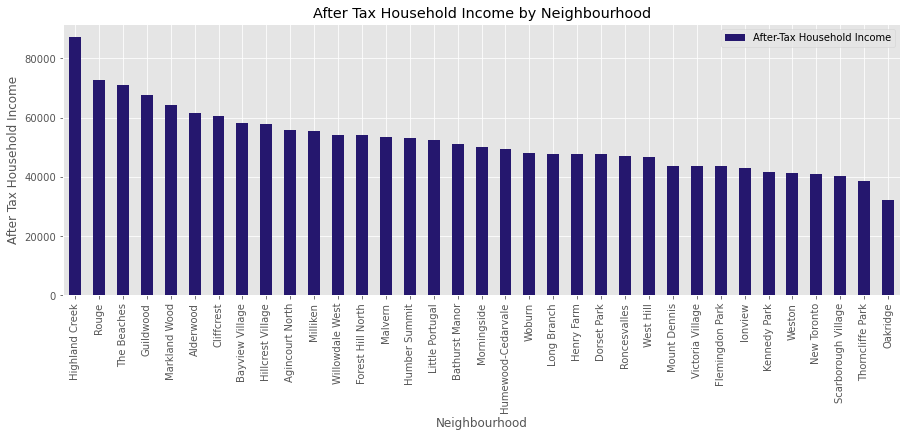

In [23]:
# define df
df_income = final_loc_stats_2[['Neighbourhood', 'After-Tax Household Income']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='After-Tax Household Income', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_income.plot(kind='bar', figsize=(15,5), color='#25176e')
plt.title('After Tax Household Income by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('After Tax Household Income')

plt.show()

In [24]:
df_income

,After-Tax Household Income
Neighbourhood,
Highland Creek,87321.0
Rouge,72784.0
The Beaches,70957.0
Guildwood,67678.0
Markland Wood,64297.0
Alderwood,61402.0
Cliffcrest,60384.0
Bayview Village,58028.0
Hillcrest Village,57682.0


### 1.5.3 Visual with Population

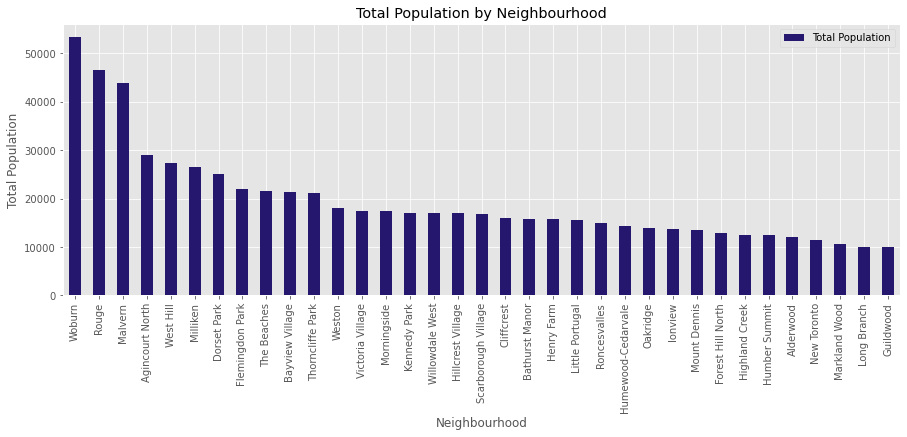

In [25]:
# define df
df_ppi = final_loc_stats_2[['Neighbourhood', 'Total Population']].set_index('Neighbourhood')

# sort by descending order
df_ppi.sort_values(by='Total Population', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_ppi.plot(kind='bar', figsize=(15,5), color='#25176e')
plt.title('Total Population by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Population')

plt.show()

In [26]:
df_ppi

,Total Population
Neighbourhood,
Woburn,53485.0
Rouge,46496.0
Malvern,43794.0
Agincourt North,29113.0
West Hill,27392.0
Milliken,26572.0
Dorset Park,25003.0
Flemingdon Park,21933.0
The Beaches,21567.0


### 1.5.4 Visual No. of Potential Vendors

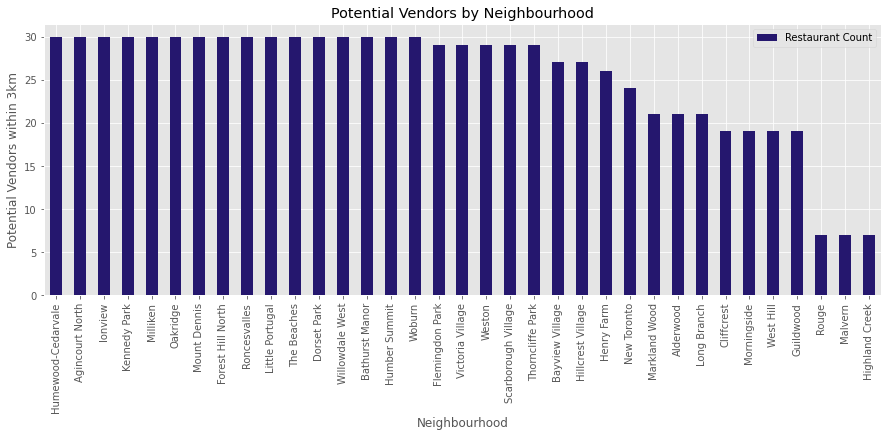

In [27]:
# define df
df_vendors = final_loc_stats_2[['Neighbourhood', 'Restaurant Count']].set_index('Neighbourhood')

# sort by descending order
df_vendors.sort_values(by='Restaurant Count', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_vendors.plot(kind='bar', figsize=(15,5), color='#25176e')
plt.title('Potential Vendors by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Potential Vendors within 3km')

plt.show()

In [28]:
df_vendors

,Restaurant Count
Neighbourhood,
Humewood-Cedarvale,30
Agincourt North,30
Ionview,30
Kennedy Park,30
Milliken,30
Oakridge,30
Mount Dennis,30
Forest Hill North,30
Roncesvalles,30


## 1.6 K-Means Clustering 

### 1.6.1 Normalise Each Category

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
final_loc_stats_2

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,21
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,24
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,21
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,21
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,30
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,30
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,30
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,29
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,29
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,27


In [31]:
k=5
final_loc_stats_3 = final_loc_stats_2
cluster = final_loc_stats_3.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Restaurant Count'], axis = 1)
cluster.rename(columns={0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Restaurant Count'}, inplace=True)
cluster.head(5)

,Latitude,Longitude
0,43.643515,-79.577201
1,43.605647,-79.501321
2,43.602414,-79.543484
3,43.602414,-79.543484
4,43.756303,-79.565963


In [32]:
kmeans = KMeans(n_clusters = k,random_state=0).fit(cluster)
kmeans.labels_

Trnt_data = final_loc_stats_3
Trnt_data.insert(0, 'Cluster Labels', kmeans.labels_)
Trnt_data

,Cluster Labels,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,4,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,21
1,4,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,24
2,4,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,21
3,4,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,21
4,1,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,30
5,1,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,30
6,1,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,30
7,0,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,29
8,0,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,29
9,3,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,27


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Trnt_data['Latitude'], Trnt_data['Longitude'], Trnt_data['Neighbourhood'], Trnt_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 1.6.2 Lets find best K

In [34]:
final_loc_stats_4 = final_loc_stats_2
cluster_2 = final_loc_stats_3.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Restaurant Count'], axis = 1)
cluster_2.rename(columns={0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Restaurant Count'}, inplace=True)

from sklearn.cluster import KMeans
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualiser
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(cluster_2)        # Fit the data to the visualiser
visualizer.show()        # Finalise and render the figure

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-21.2.0               |     pyhd3eb1b0_0          46 KB
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    dbus-1.13.18               |       hb2f20db_0         504 KB
    gst-plugins-base-1.14.0    |       h8213a91_2         4.9 MB
    gstreamer-1.14.0           |       h28cd5cc_2         3.2 MB
    importlib_metadata-1.5.0   |           py36_0          48 KB
    iniconfig-1.1.1            |     pyhd3eb1b0_0           8 KB
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    matplotlib-3.3.4           |   py36h06a4308_0          26 KB
    more-itertools-8.8.0       |     pyhd3eb1b0_0     

ModuleNotFoundError: No module named 'yellowbrick'

## 1.7 Analysing the Clusters

### 1.7.1 Starting with Cluster 0

In [35]:
Trnt_data_C0 = Trnt_data.drop(['Postcode', 'Borough'], axis = 1)
Trnt_data_C0 = Trnt_data_C0[Trnt_data_C0["Cluster Labels"].isin([0])]
Trnt_data_C0_mean = Trnt_data_C0.mean()
Trnt_data_C0_mean

Cluster Labels                    0.000000
After-Tax Household Income    46187.700000
Total Population              18438.900000
Latitude                         43.721894
Longitude                       -79.285979
Restaurant Count                 28.500000
dtype: float64

In [36]:
stats_neighbourhood = pd.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Restaurant Count'])

Trnt_data_C = Trnt_data.drop(['Postcode', 'Borough'], axis = 1)
Trnt_data_C0 = Trnt_data_C[Trnt_data_C["Cluster Labels"].isin([1])]
Trnt_data_C0_mean = Trnt_data_C0.mean().to_frame().transpose()

stats_neighbourhood = stats_neighbourhood.append(Trnt_data_C0_mean, ignore_index = True)
stats_neighbourhood

,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Restaurant Count
0,1.0,49594.666667,14946.0,43.708775,-79.462251,29.888889


### 1.7.2 Analysing all clusters

In [37]:
i = 0
stats_neighbourhood = pd.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Restaurant Count'])

for x in range (0, 5):

    Trnt_data_C = Trnt_data.drop(['Postcode','Borough'], axis = 1)
    Trnt_data_C0 = Trnt_data_C[Trnt_data_C["Cluster Labels"].isin([i])]
    Trnt_data_C0_mean = Trnt_data_C0.mean().to_frame().transpose()

    stats_neighbourhood = stats_neighbourhood.append(Trnt_data_C0_mean, ignore_index = True)
    i = i + 1

stats_neighbourhood

,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Restaurant Count
0,0.0,46187.700000,18438.900000,43.721894,-79.285979,28.500000
1,1.0,49594.666667,14946.000000,43.708775,-79.462251,29.888889
2,2.0,60855.428571,30147.571429,43.779945,-79.190322,15.428571
3,3.0,54945.200000,21947.600000,43.799946,-79.333027,28.000000
4,4.0,53559.500000,11038.750000,43.613497,-79.541372,21.750000


In [38]:
from sklearn import preprocessing

# drop non-variable columns 
stats_neighbourhood_norm = stats_neighbourhood.drop(['Cluster Labels','Latitude','Longitude', ], axis = 1)

x = stats_neighbourhood_norm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalised = pd.DataFrame(x_scaled)
df_normalised

,0,1,2
0,0.000000,0.387264,0.903952
1,0.232276,0.204474,1.000000
2,1.000000,1.000000,0.000000
3,0.597059,0.570880,0.869374
4,0.502586,0.000000,0.437157


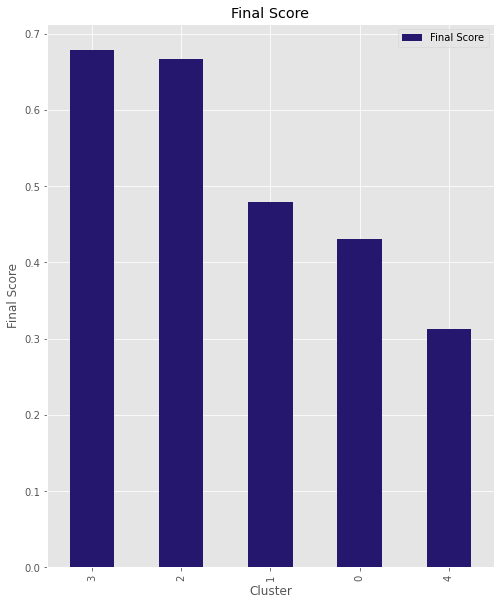

In [39]:
df_normalised_final = df_normalised.mean(axis=1).to_frame()
df_normalised_final .rename(columns={0:'Final Score'}, inplace=True)
df_normalised_final.sort_values(by='Final Score', ascending=False, inplace=True)

# plot graph
mpl.style.use('ggplot')
df_normalised_final.plot(kind='bar', figsize=(8,10), color='#25176e')
plt.title('Final Score')
plt.xlabel('Cluster')
plt.ylabel('Final Score')

plt.show()

In [40]:
df_normalised_final

,Final Score
3,0.679105
2,0.666667
1,0.478917
0,0.430405
4,0.313248
